In [20]:
# کتابخانه‌های مورد نیاز
import numpy as np
from scipy.integrate import fixed_quad, quad
import time
import pandas as pd
import matplotlib.pyplot as plt
import os

In [23]:
# تعریف توابع برای تست
functions = {
    'x^2': lambda x: x**2,
    'sin(x)': lambda x: np.sin(x),
    'exp(-x^2)': lambda x: np.exp(-x**2),
    'sqrt(x)': lambda x: np.sqrt(x),
    '1/(1 + x^2)': lambda x: 1 / (1 + x**2),
    '|x|': lambda x: np.abs(x),
    'ln(x)': lambda x: np.where(x > 0, np.log(x), 0)
}

In [24]:
# روش‌های انتگرال‌گیری
def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    h = (b - a) / n
    integral = (f(x[0]) + f(x[-1])) / 2 + np.sum(f(x[1:-1]))
    return integral * h

In [25]:
def simpsons_rule(f, a, b, n):
    if n % 2 == 1:
        n += 1
    x = np.linspace(a, b, n+1)
    h = (b - a) / n
    integral = f(x[0]) + f(x[-1]) + 4 * np.sum(f(x[1:-1:2])) + 2 * np.sum(f(x[2:-2:2]))
    return integral * h / 3

In [26]:
def gaussian_quadrature(f, a, b, n):
    result, _ = fixed_quad(f, a, b, n=n)
    return result

In [27]:
# پارامترهای کلی
a, b = 0.01, 1  # بازه انتگرال‌گیری (برای جلوگیری از تکینگی در log(x))
n_values = np.linspace(10, 1000, 10, dtype=int)  # تعداد نقاط از 10 تا 1000

In [28]:
# ذخیره نتایج
comparison_results = []
# پوشه برای ذخیره نمودارها
output_dir = './integration_plots'
os.makedirs(output_dir, exist_ok=True)

In [29]:
# اجرای روش‌ها برای هر تابع
for func_name, func in functions.items():
    # مقدار مرجع با دقت بالا از quad
    true_value, _ = quad(func, a, b)
    
    for n in n_values:
        # ذوزنقه‌ای
        start = time.time()
        trap_result = trapezoidal_rule(func, a, b, n)
        trap_time = time.time() - start
        trap_error = abs(trap_result - true_value)
        
        # سیمپسون
        start = time.time()
        simp_result = simpsons_rule(func, a, b, n)
        simp_time = time.time() - start
        simp_error = abs(simp_result - true_value)
        
        # گاوسی
        start = time.time()
        gauss_result = gaussian_quadrature(func, a, b, n)
        gauss_time = time.time() - start
        gauss_error = abs(gauss_result - true_value)
        
        # ثبت نتایج برای هر روش
        comparison_results.append({
            'Function': func_name,
            'Method': 'Trapezoidal',
            'n': n,
            'Approximation': trap_result,
            'Error': trap_error,
            'Time (s)': trap_time
        })
        
        comparison_results.append({
            'Function': func_name,
            'Method': 'Simpson',
            'n': n,
            'Approximation': simp_result,
            'Error': simp_error,
            'Time (s)': simp_time
        })
        
        comparison_results.append({
            'Function': func_name,
            'Method': 'Gaussian',
            'n': n,
            'Approximation': gauss_result,
            'Error': gauss_error,
            'Time (s)': gauss_time
        })

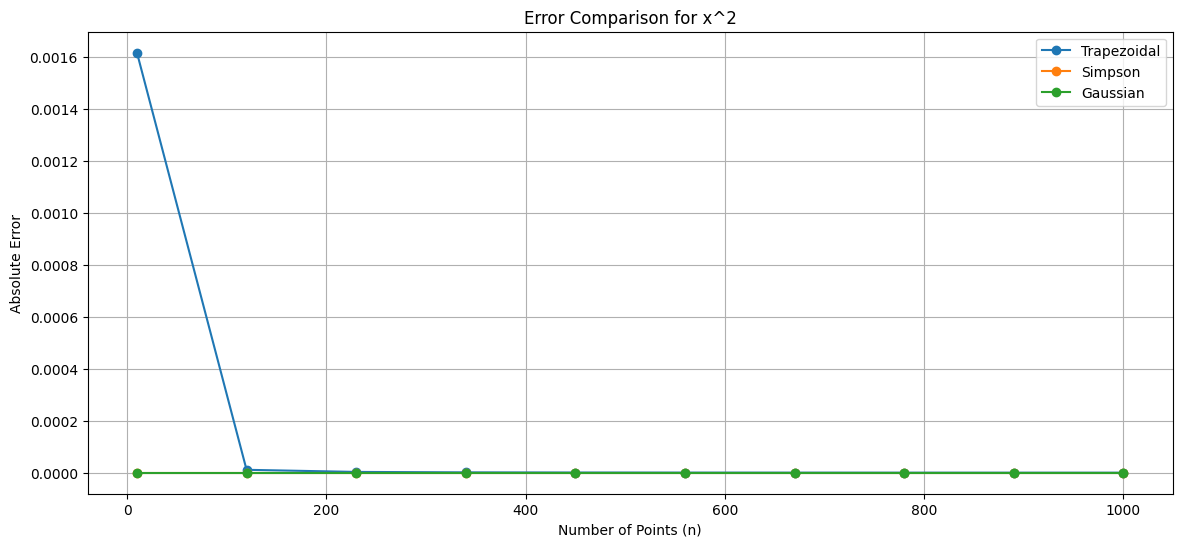

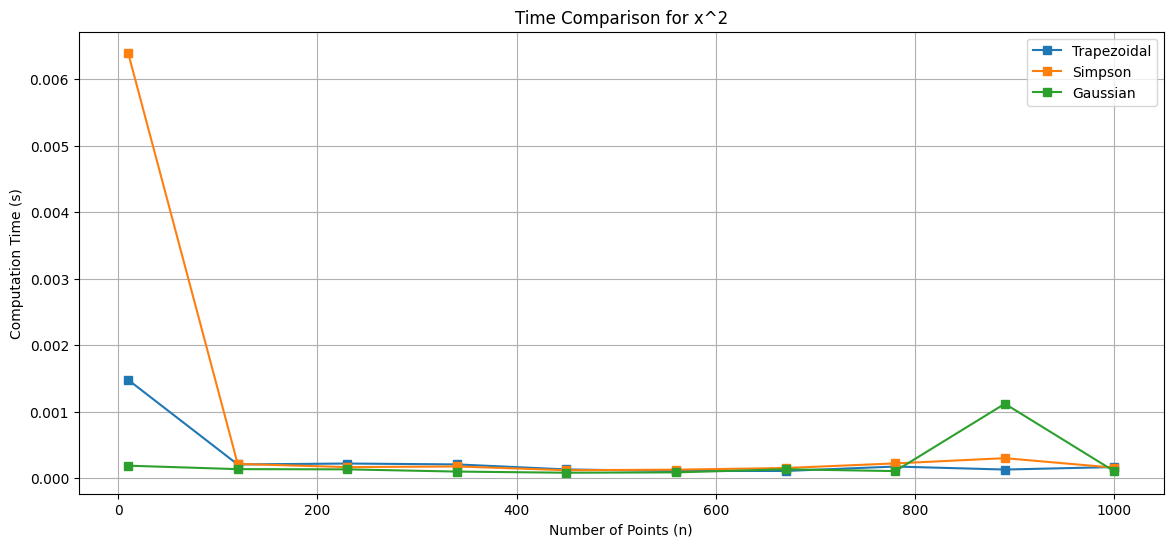

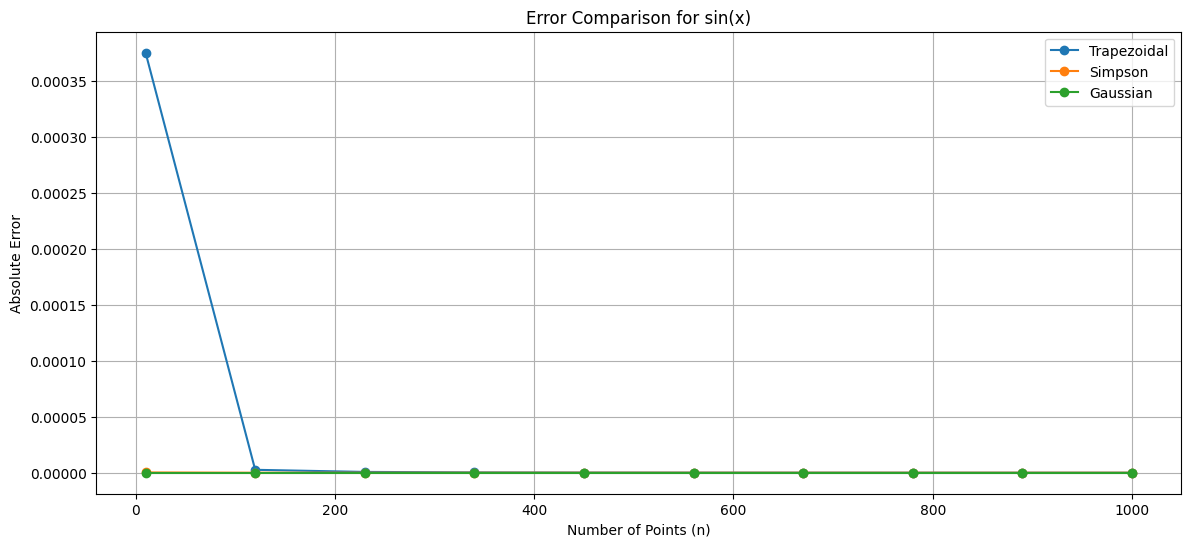

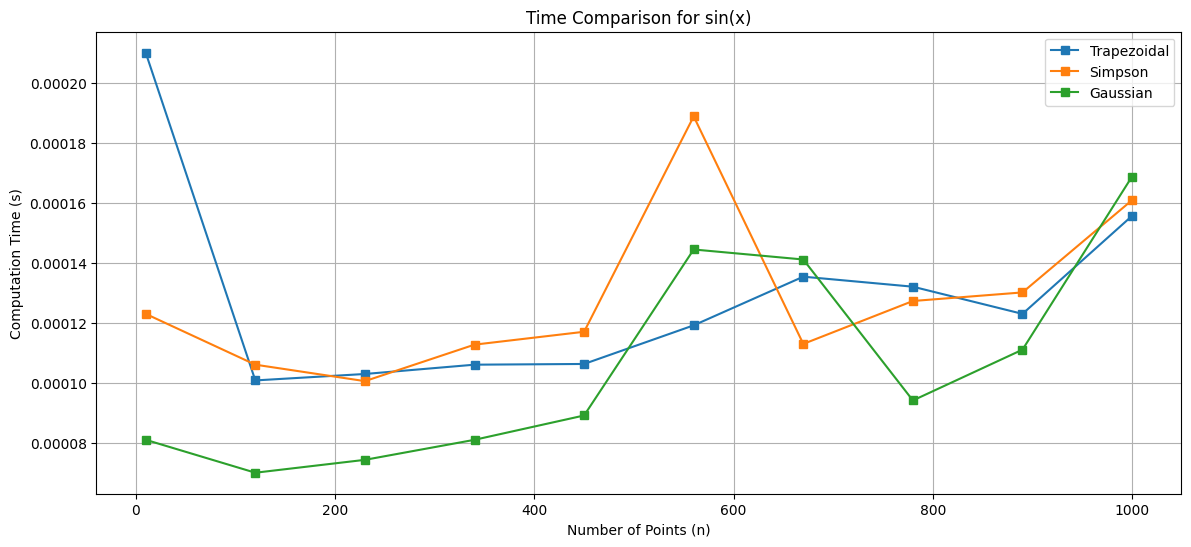

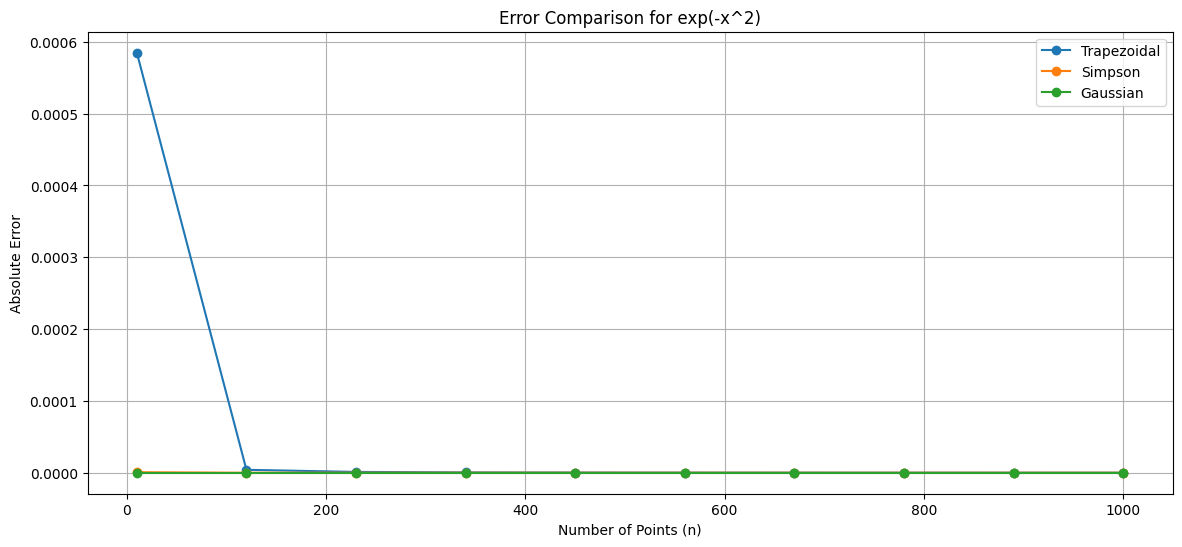

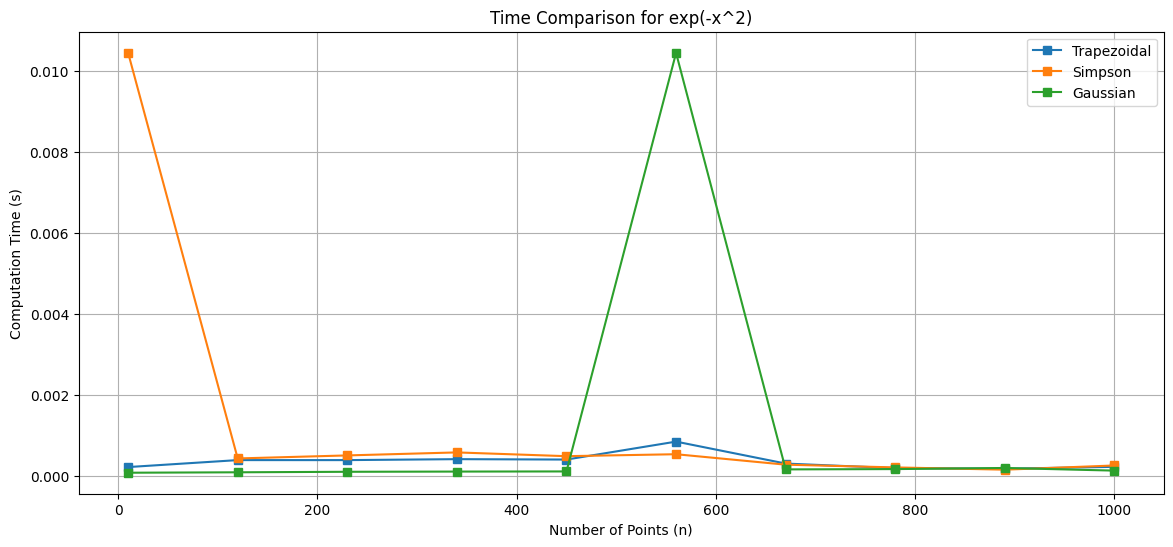

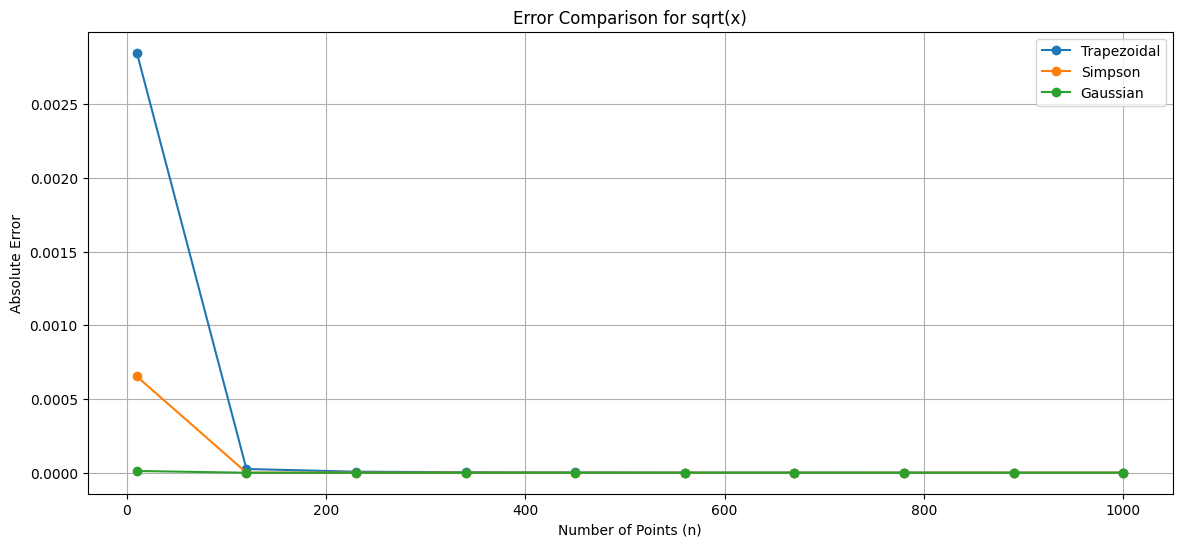

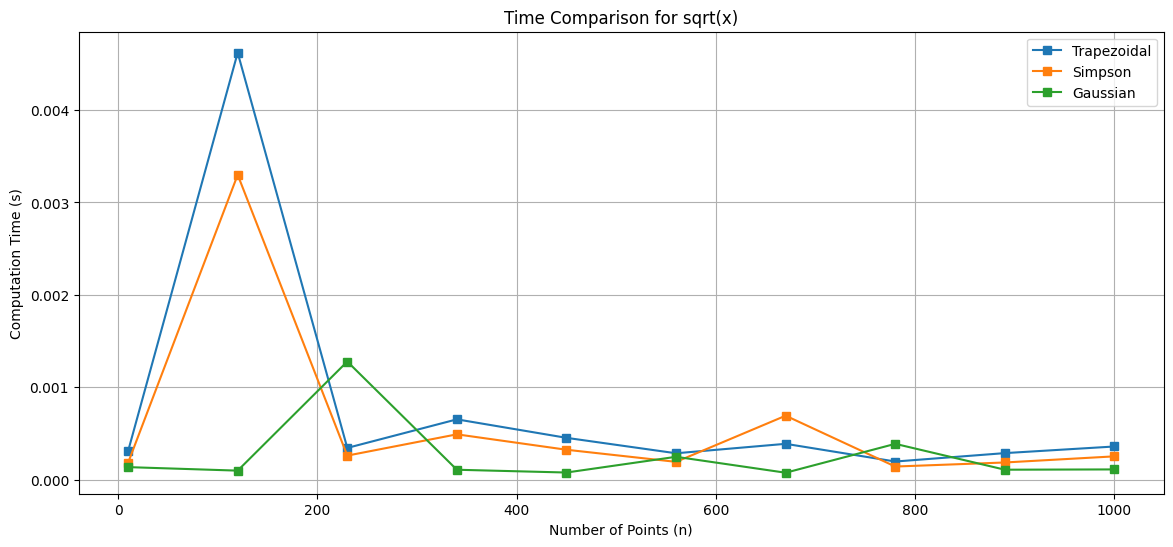

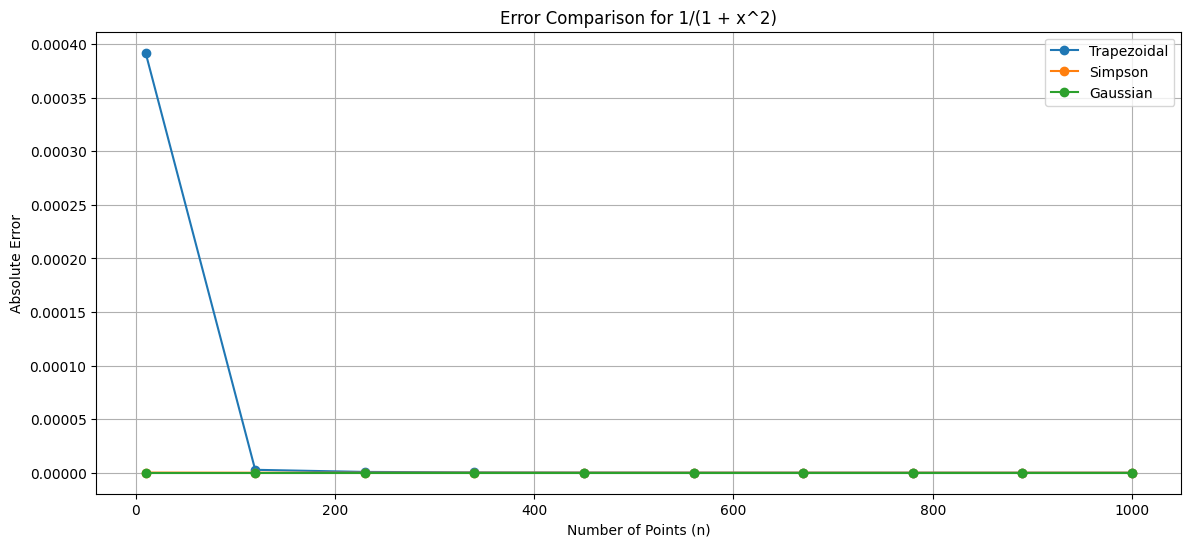

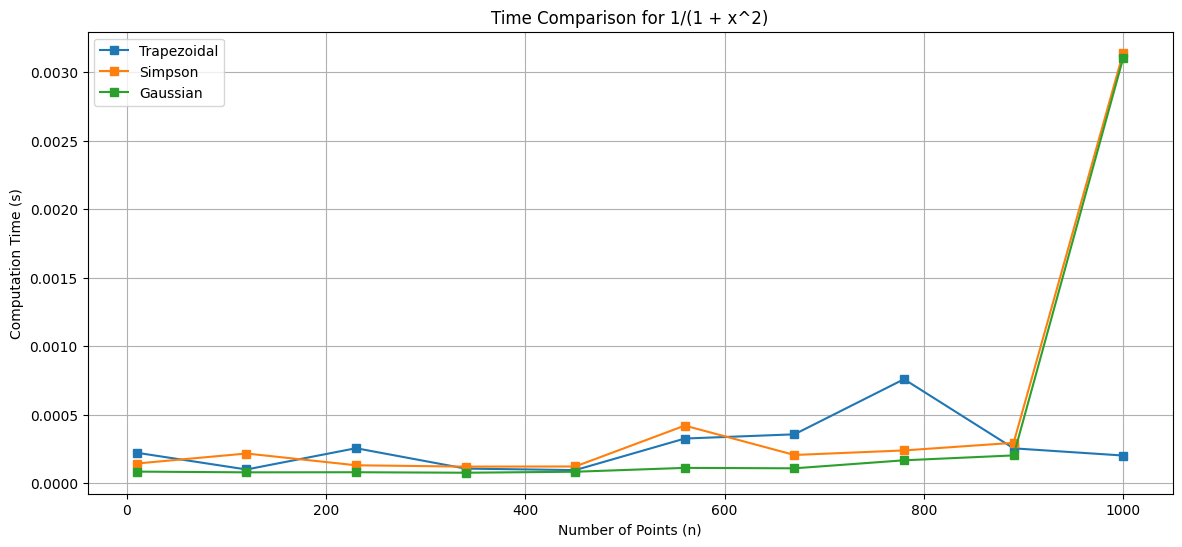

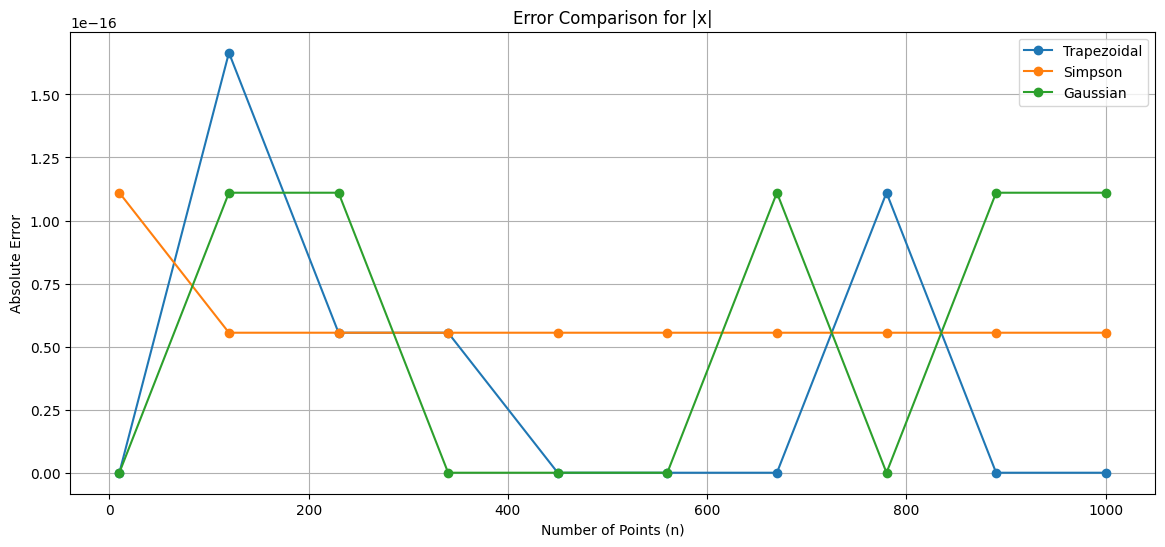

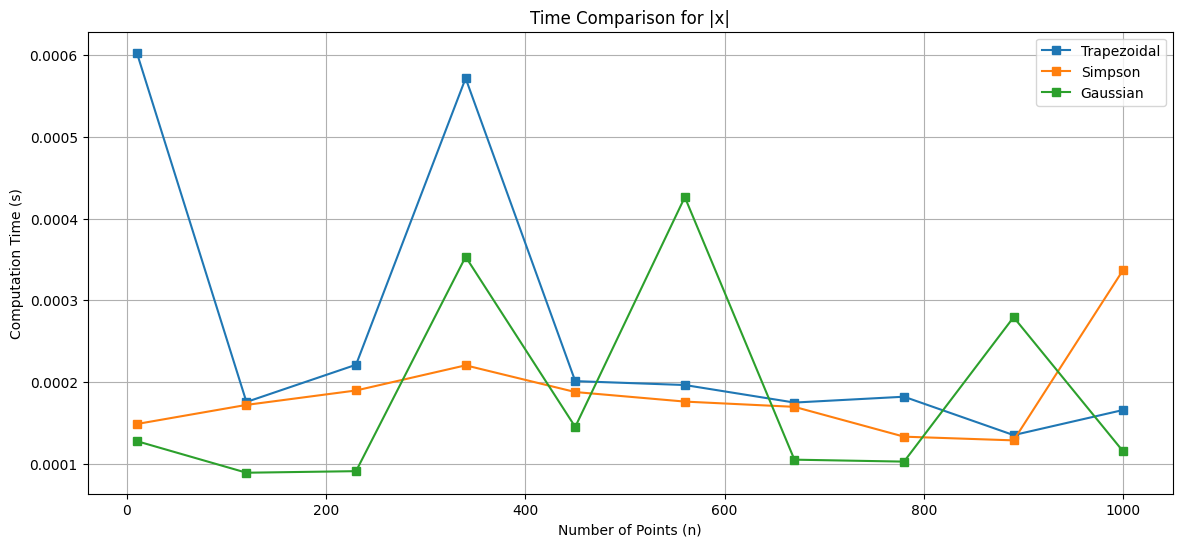

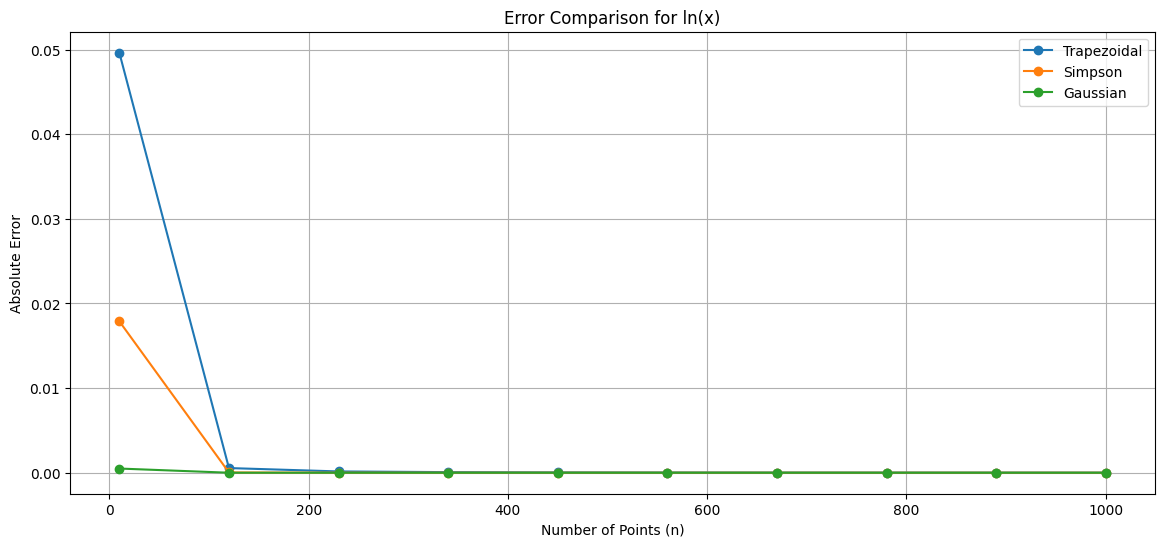

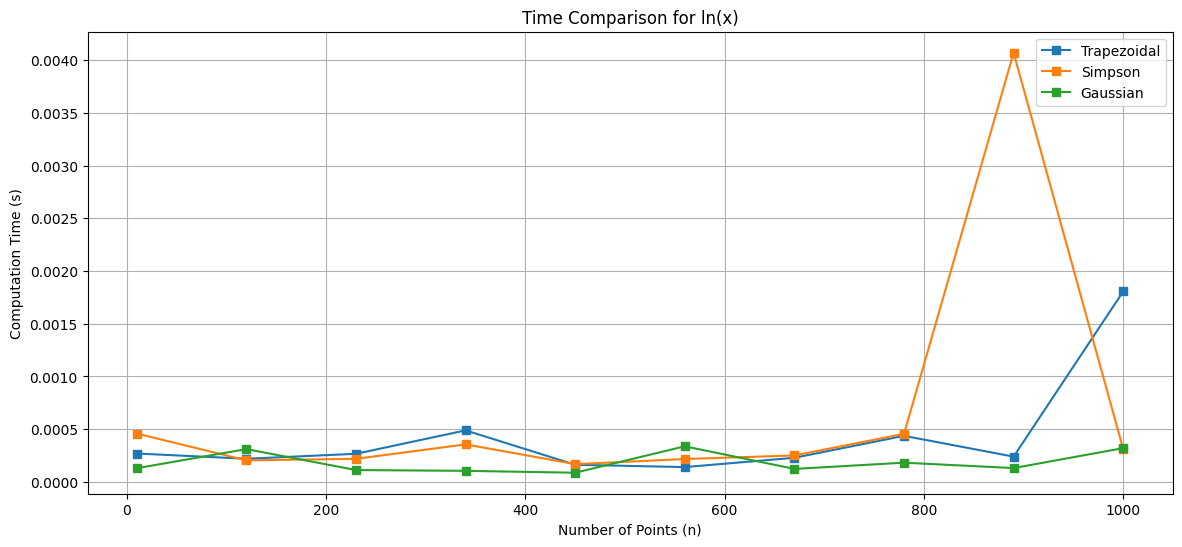

In [30]:
# ذخیره نتایج در جدول
df = pd.DataFrame(comparison_results)
df.to_csv(os.path.join(output_dir, 'results.csv'), index=False)

# 📈 رسم نمودارهای جداگانه برای هر تابع
number = 0
for func in functions.keys():
    subset = df[df['Function'] == func]
    
    # 📈 نمودار خطا برای هر روش
    plt.figure(figsize=(14, 6))
    for method in ['Trapezoidal', 'Simpson', 'Gaussian']:
        method_subset = subset[subset['Method'] == method]
        plt.plot(method_subset['n'], method_subset['Error'], marker='o', label=f'{method}')
    
    plt.xlabel('Number of Points (n)')
    plt.ylabel('Absolute Error')
    plt.title(f'Error Comparison for {func}')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f'{number}_error_plot.png'))
    plt.show()
    number += 1
    
    # ⏱️ نمودار زمان محاسبات برای هر روش
    plt.figure(figsize=(14, 6))
    for method in ['Trapezoidal', 'Simpson', 'Gaussian']:
        method_subset = subset[subset['Method'] == method]
        plt.plot(method_subset['n'], method_subset['Time (s)'], marker='s', label=f'{method}')
    
    plt.xlabel('Number of Points (n)')
    plt.ylabel('Computation Time (s)')
    plt.title(f'Time Comparison for {func}')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f'{number}_time_plot.png'))
    plt.show()
    number += 1